<a href="https://colab.research.google.com/github/cinaral/saymyname/blob/master/Final_Closed_Loop_Canonical_Form_Transfer_Function_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this page, we will work on any transfer function of canonical closed loop control systems. We will get output function, 
and we will analyse the system.

A control system provides the desired responce by controlling the output.

Open loop control systems are manually controlled systems, and they are not accurate because control action is independent 
of the output.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/Open-loop-feedback-system.jpg)

Closed loop systems are controlled by feedback loop which makes them accurate because control action depends on the 
output.It tries to make the error between the desired output and obtained output acceptably small.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/ctr.png)

Transfer function is a Laplace (s) domain function to define the control system. 
It is the ratio of output and input in s domain. Later, we can return back time domain input and output 
by inverse Laplace transform.

By applying reduction operations, we can obtain equivalent canonical form of the closed loop systems 
which has one total plant function and one total feedback function.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/3-block-diagram-representation-8-638.jpg)

Steps 4 and 5 are actually used when they are needed.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/8-block-diagram-representation-13-638.jpg)

At the end, we will reach the canonical form.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/1-block-diagram-representation-6-638.jpg)

This is the canonical form of closed loop system with the negative feedback.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/Matrix-transfer-function-feedback-system.jpg)

Its closed loop transfer function is

\begin{equation*}
\frac{G(s)}{1+G(s)H(s)}
\end{equation*}

After doing these, we need to find output function.

Let' s get and import necessary libraries.

In [0]:
!pip install control

import matplotlib
import ipywidgets
import plotly
import numpy as np
import math
import os
from IPython import *
import scipy

%matplotlib inline
from sympy import symbols
from sympy import simplify
from sympy.abc import s, t, a
from sympy.integrals import *
from sympy.plotting import *
from control import *
from control.matlab import *
import matplotlib.pyplot as plt
from sympy import Heaviside

Now, let's write Laplace domain functions.

With the help of the Python Control library, we can use the Matlab format.

\begin{equation*}
\frac{as^n+bs^{n-1}+cs^{n-2}+\cdots+ws^{1}+xs^{0}}{ds^{n+1}+es^{n}+\cdots+ms^{1}+ks^{0}}
\end{equation*}

This is a transfer function.

We will write its coefficients for numerator like;

a  b  c  ...  w  s

Then its denumerator like;

d  e  ...  m  k

so it is just numbers and space between them.

First, let's write any input function.

In [58]:
numX = list(map(float,input('enter coefficients of numerator of input function = ').split()))
denX = list(map(float,input('enter coefficients of denumerator of input function = ').split()))
X = tf(numX, denX)
print('Input or reference function in s domain')
print(X)

enter coefficients of numerator of input function = 1
enter coefficients of denumerator of input function = 1 2 3
Input or reference function in s domain

      1
-------------
s^2 + 2 s + 3



Now, any canonical plant function.

In [59]:
numG = list(map(float,input('enter coefficients of numerator of canonical plant function = ').split()))
denG = list(map(float,input('enter coefficients of denumerator of canonical plant function = ').split()))
G = tf(numG, denG)
print('Canonical plant function in s domain')
print(G)

enter coefficients of numerator of canonical plant function = 1 2
enter coefficients of denumerator of canonical plant function = 3 4 5
Canonical plant function in s domain

     s + 2
---------------
3 s^2 + 4 s + 5



Then, we can write any canonical negative feedback function. It will directly give open loop and closed loop transfer function and the output of the system.

In [61]:
numH = list(map(float,input('enter coefficients of numerator of canonical feedback function = ').split()))
denH = list(map(float,input('enter coefficients of denumerator of canonical feedback function = ').split()))
H = tf(numH, denH)
print('Canonical feedback function in s domain')
print(H)

GH = G*H
print('Open loop transfer function')
print(GH)

M = G/(1+G*H)
print('Closed loop transfer function')
print(M)

Y = M*X
print('Output in s domain')
print(Y)

enter coefficients of numerator of canonical feedback function = 1
enter coefficients of denumerator of canonical feedback function = 1 0
Canonical feedback function in s domain

1
-
s

Open loop transfer function

       s + 2
-------------------
3 s^3 + 4 s^2 + 5 s

Closed loop transfer function

       3 s^4 + 10 s^3 + 13 s^2 + 10 s
--------------------------------------------
9 s^5 + 24 s^4 + 49 s^3 + 50 s^2 + 38 s + 10

Output in s domain

                  3 s^4 + 10 s^3 + 13 s^2 + 10 s
-------------------------------------------------------------------
9 s^7 + 42 s^6 + 124 s^5 + 220 s^4 + 285 s^3 + 236 s^2 + 134 s + 30



Now, let's analyse this closed loop system.

Most of the times, we look the response of the system to impulse and step inputs. Of course we can give any input ,but we need to get stable output to control the system at the end. Any input can easily cause unstability, oscillations, or resonance in the output.

First, let's see impulse response.

Impulse responce


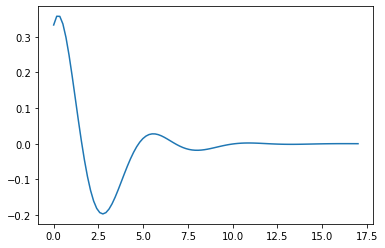

In [62]:
#impulse responce
print('Impulse responce')
plt.figure(2)
yout, T = impulse(M)
plt.plot(T.T, yout.T)
plt.show(block=False)

Second, let us look step response.

Step response


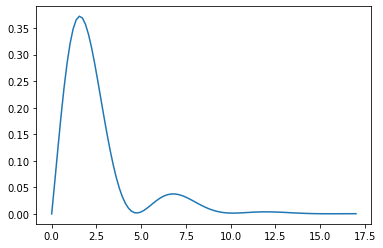

In [63]:
# Step response for the system
print('Step response')
plt.figure(1)
yout, T = step(M)
plt.plot(T.T, yout.T)
plt.show(block=False)

We can also use frequency responce to analyse the system by looking its Bode plot.

Bode plot


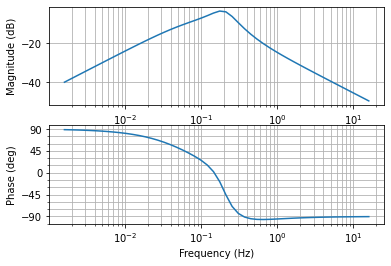

In [64]:
# Bode plot for the system
print('Bode plot')
plt.figure(3)
mag, phase, om = bode(M, logspace(-2, 2), Plot=True)
plt.show(block=False)

Lastly, we can look the roots of the transfer function to obtain indirect information on the time and frequency responses.

If the root locus path is in the left hand side of the imaginary axis, then the system is stable.

(array([[-6.66666667e-01-1.1055416j , -6.66666667e-01+1.1055416j ,
         -4.61000747e-01-1.18668856j, -4.61000747e-01+1.18668856j,
         -4.11331839e-01+0.j        ],
        [-6.66666667e-01-1.1055416j , -6.66666667e-01+1.1055416j ,
         -5.55178932e-01-1.25012508j, -5.55178932e-01+1.25012508j,
         -3.56308772e-01+0.j        ],
        [-6.66666667e-01-1.1055416j , -6.66666667e-01+1.1055416j ,
         -5.55178932e-01-1.25012508j, -5.55178932e-01+1.25012508j,
         -3.56308772e-01+0.j        ],
        ...,
        [-6.66666667e-01-1.1055416j , -6.66666667e-01+1.1055416j ,
         -1.78292224e+02+0.j        , -2.01703299e+00+0.j        ,
         -1.85380197e-03+0.j        ],
        [-6.66666667e-01-1.1055416j , -6.66666667e-01+1.1055416j ,
         -1.78910924e+03+0.j        , -2.00167884e+00+0.j        ,
         -1.86156190e-04+0.j        ],
        [-6.66666667e-01-1.1055416j , -6.66666667e-01+1.1055416j ,
         -1.78971109e+04+0.j        , -2.00016765e+00+0

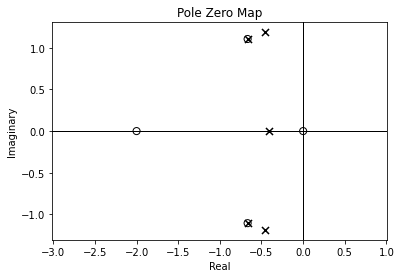

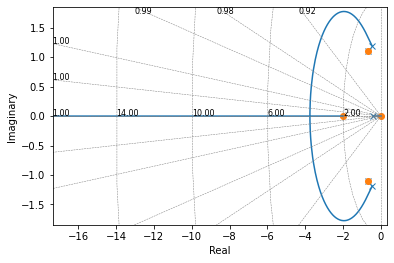

In [65]:
#Positions of poles and zeros
pzmap(M,Plot=True,grid=False, title='Pole Zero Map')

# Root lcous plot for the system
rlocus(M)

As we said, we can see time domain of any output function. In order to do this, we will use another code with the help of sympy library.

Here, we will write functions in s domain in complete form ,but we need to use *'*'* for multiplications of coefficients, '**' for exponents, '/' for division, and '()' for mathematical operation priority.

\begin{equation*}
{(A*s**n+B*s**(n-1)+\cdots+W*s**2+X*s+Y)/(D*s**(n+1)+C*s**n+\cdots+M*s+N)}
\end{equation*}

First, we will write any input function in s domain.

In [72]:
X = eval(input('enter input s domain function = '))
print('Input function in s domain')
print(X)

enter input s domain function = 1
Input function in s domain
1


Then, any canonical plant function.

In [73]:
G = eval(input('enter s domain canonical plant function = '))
print('Canonical plant function')
print(G)

enter s domain canonical plant function = 1/(s**2+1)
Canonical plant function
1/(s**2 + 1)


We can write any canonical negative feedback function, and it will give output in s domain. It will also plot the output in s domain.

enter s domain canonical feedback function = s
Canonical feedback function
s
Closed loop transfer function
1/((s**2 + 1)*(s/(s**2 + 1) + 1))
Output in s domain
1/(s**2 + s + 1)


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning:


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning:


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.



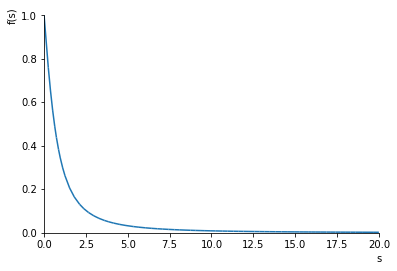

In [78]:
H = eval(input('enter s domain canonical feedback function = '))
print('Canonical feedback function')
print(H)

M = G/(1+G*H)
print('Closed loop transfer function')
print(M)

Y = M*X
C = simplify(Y)
print('Output in s domain')
print(C)
f = plot(C,(s,0,20), show = False)
f.show()

Now, we can apply inverse Laplace Transform to obtain output in time domain if it exists. Otherwise it will give error. Hence, we can see any response of the system to any input.

Output in time domain
2*sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2)/3


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning:


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning:


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.



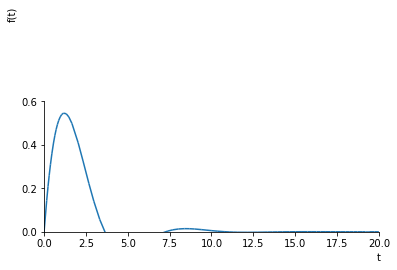

In [79]:
u = inverse_laplace_transform(C,s,t)
u = u/Heaviside(t)
u = simplify(u)
print('Output in time domain')
print(u)

p = plot(u,(t,0,20), show = False)
p.show()